In [58]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [59]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

[5 0 4 1 9 2 1 3 1 4]


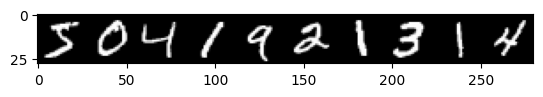

In [60]:
import matplotlib.pyplot as plt
import numpy as np

img=np.hstack(x_train[:10])
plt.imshow(img, cmap='gray')
print(y_train[:10])

In [61]:
len(y_train), len(y_test), np.unique(y_train, return_counts=True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [62]:
# 추가코드  28행, 28열의 흑백이미지 60000장
np.shape(x_train), np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

In [63]:
#################
## x,y 데이터 훈련, 테스트로 나누어진 데이터를 array로 받음
## 사진데이터를 로드, 사이즈 통일, array로 하고 레이블 변환x
## 지도학습, 사진을 넣으면 0,1,2,3,4,5,6,7,8,9의 10개 중 어떤 카테고리인가를 맞추는
## 다항분류 문제, 이 다항문제는 무조건 원핫인코딩되어 있거나
## 아니면 모델에서 원핫인코딩 시켜야 함
## 원핫인코딩 : 0은 [1,0,0,0,0,0,0,0,0,0]
##              9는 [0,0,0,0,0,0,0,0,0,1]
#################

In [64]:
######################
## 샘플
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(3,3)),
        tf.keras.layers.Dense(5, activation='relu'),   # w(100)+b(1) 기본 101개
        tf.keras.layers.Dense(2, activation='softmax')  # softmax는 다항분류 계산식(활성화함수)
])
model.weights

[<tf.Variable 'dense_18/kernel:0' shape=(9, 5) dtype=float32, numpy=
 array([[ 0.23734623, -0.22609153, -0.22058466,  0.60495734, -0.13588917],
        [ 0.323201  ,  0.49102163, -0.42863488,  0.30098104,  0.09262991],
        [-0.62945116,  0.03800648, -0.42611557,  0.32575554, -0.02184457],
        [-0.20267805,  0.19985205, -0.51778746, -0.5042973 , -0.45366427],
        [ 0.11079907,  0.48101115,  0.21543336, -0.14910036, -0.23655337],
        [-0.574247  , -0.5093364 , -0.49739176, -0.00502491,  0.22758102],
        [-0.45560578,  0.40325022, -0.3886293 ,  0.4495169 , -0.607058  ],
        [-0.33907914, -0.20544365,  0.24466568, -0.57019305, -0.62685865],
        [-0.37089467, -0.20792443,  0.6166153 , -0.02066129, -0.38869843]],
       dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_19/kernel:0' shape=(5, 2) dtype=float32, numpy=
 array([[-0.6399823 , -0.04668146],
        [-0.80415

In [65]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') # softmax는 다항분류 계산식(활성화함수)
])

# softmax는 categorical_crossentropy인데
# y입력값이 원핫인코딩 안되어 있으면 sparse_categorical_crossentropy라고 지정하면
# 알아서 원핫인코딩함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# model.summary()
hist=model.fit(x_train,y_train,epochs=50,
          validation_data=(x_train,y_train),batch_size=100)

Epoch 1/50
600/600 [==============================] - 8s 12ms/step - loss: 0.3569 - accuracy: 0.9024 - val_loss: 0.1980 - val_accuracy: 0.9460
Epoch 2/50
600/600 [==============================] - 4s 7ms/step - loss: 0.1670 - accuracy: 0.9525 - val_loss: 0.1303 - val_accuracy: 0.9630
Epoch 3/50
600/600 [==============================] - 6s 9ms/step - loss: 0.1197 - accuracy: 0.9657 - val_loss: 0.0978 - val_accuracy: 0.9721
Epoch 4/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0934 - accuracy: 0.9726 - val_loss: 0.0727 - val_accuracy: 0.9795
Epoch 5/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0755 - accuracy: 0.9779 - val_loss: 0.0603 - val_accuracy: 0.9833
Epoch 6/50
600/600 [==============================] - 5s 9ms/step - loss: 0.0628 - accuracy: 0.9816 - val_loss: 0.0488 - val_accuracy: 0.9869
Epoch 7/50
600/600 [==============================] - 6s 10ms/step - loss: 0.0534 - accuracy: 0.9842 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoc

In [67]:
model.save_weights('mnist_weights.h5')

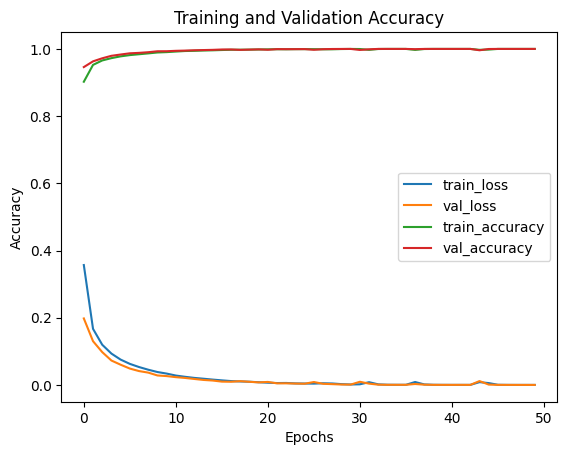

In [68]:
# 손실 그래프 그리기
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 그리기
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
testDat=x_test[:30]
print(np.shape(testData))  # 30,28,28   훈련데이터의 shape과 같음

predictions=model([testData])
result=tf.nn.softmax(predictions)
result

(30, 28, 28)


<tf.Tensor: shape=(30, 10), dtype=float32, numpy=
array([[0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
       [0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533679, 0.2319687 , 0.0853368 , 0.08533679, 0.08533679,
        0.08533679, 0.08533679, 0.08533679, 0.08533704, 0.08533679],
       [0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.0853368 , 0.0853368 , 0.0853368 , 0.0853368 , 0.23196831,
        0.0853368 , 0.0853368 , 0.0853368 , 0.0853368 , 0.08533724],
       [0.08533676, 0.23196904, 0.08533676, 0.08533676, 0.08533676,
        0.08533676, 0.08533676, 0.08533687, 0.08533676, 0.08533676],
       [0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196927,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08

In [73]:
# 모델 저장
model.save('/content/mnist_model.h5')

# 모델 불러오기
import tensorflow as tf
model = tf.keras.models.load_model('/content/mnist_model.h5')

(28, 28)


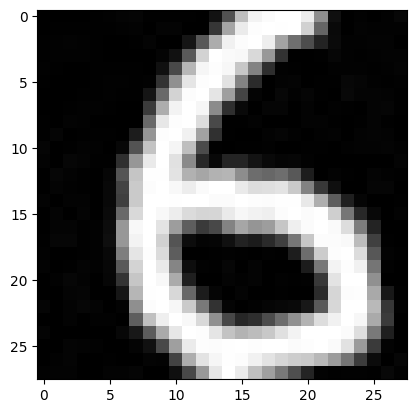

In [104]:
### 이미지 준비
from PIL import Image
img=Image.open('num6.jpg').resize((28,28)).convert('L')
img=np.array(img);img=255-img; img=img/ 255.0
print(np.shape(img))  # x_train의 shpae은 6000,28,28
plt.imshow(img,cmap='gray')

In [105]:
newimg=np.reshape(img,(1,28,28))  # 학습할때의 shpae이 6000,28,28  의 3차원 이기때문에
model.predict(newimg)   # y값이 원핫인코딩이 되어서 들어간 자료는 이 작업으로 해서 가장 큰 값 위치

1/1 [==============================] - 0s 31ms/step


array([[4.19726557e-37, 1.78447809e-27, 1.08813504e-22, 4.75985057e-20,
        0.00000000e+00, 1.00000000e+00, 3.77090111e-27, 3.80677073e-36,
        1.54645695e-30, 9.02429749e-15]], dtype=float32)

In [106]:
## y값을 원핫인코딩하지 않고 모델작업에서 loss에서
# loss='sparse_categorical_crossentropy' 하면 tf.nn.sofrmax해야 해야함

predictions=model(newimg)
result=tf.nn.softmax(predictions)
num=np.argmax(result)  #가장큰 위치값 구하기, 숫자값이 최종결과라 여기서 끝이지만,
num

5

In [107]:
### 만약 레이블이 따로 있다면
class_num=['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9']
class_num[num]

'숫자5'